### Importing Libraries

In [5]:
!unzip /content/drive/MyDrive/Colab_Notebooks/New_task/data.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/New_task/data.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/1

In [7]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning Libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical

# CNN Layers
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import os
import random as rn
import tensorflow as tf

# for Manipulating Images
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [8]:
### Checking total flower classes in the dataset
print(os.listdir('/content/flowers'))

['daisy', 'tulip', 'sunflower', 'rose', 'dandelion']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading and Preparing Data

In [9]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers/rose'

In [ ]:
### Helper functions for assigning class labels according to directories

def assign_label(img, flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
### Assigning labels according to respective directories

make_train_data('Daisy', FLOWER_DAISY_DIR)
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip', FLOWER_TULIP_DIR)
make_train_data('Dandelion', FLOWER_DANDI_DIR)
make_train_data('Rose', FLOWER_ROSE_DIR)

print("\nSize of Data: ", len(Z))

100%|██████████| 784/784 [00:01<00:00, 472.64it/s]


Size of Data:  4317


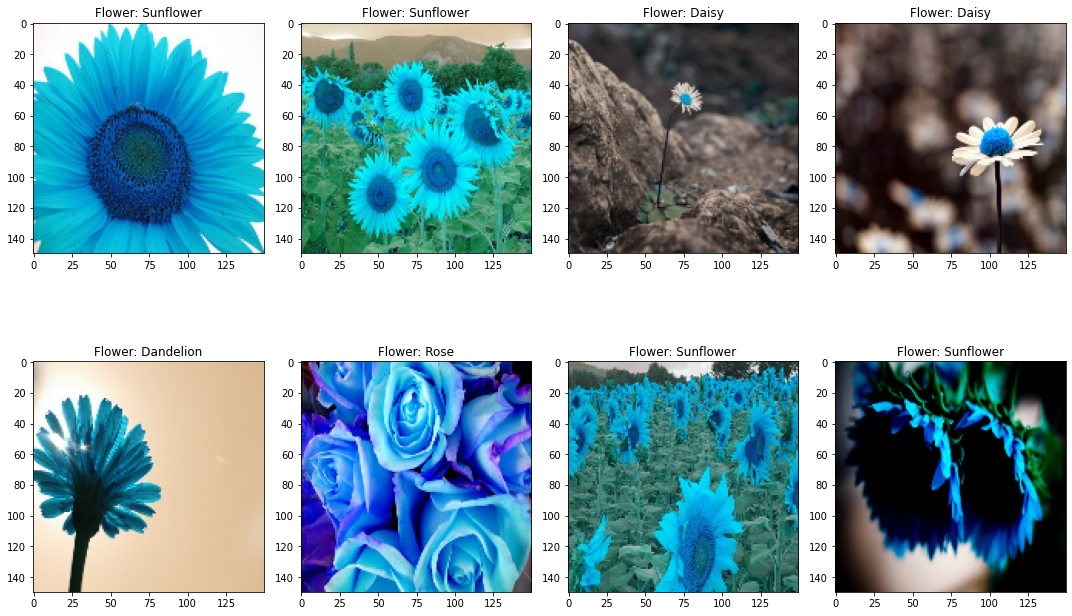

In [ ]:
### Sample images from dataset

fig,ax=plt.subplots(2,4)
fig.set_size_inches(15, 10)
for i in range(2):
    for j in range (4):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Pre Processing

In [ ]:
### Label Encoding Daisy->0, Rose->1 etc, and then One Hot Encoding and Standardization

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### Splitting Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
### Seeds for reproducing the results

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### CNN Model (From Scratch)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

### Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,
        vertical_flip=False) 


datagen.fit(x_train)

### Model Compilation & Summary

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

### Model Training & Validation

In [ ]:
batch_size=128
epochs=50

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 49s 660ms/step - loss: 1.4402 - accuracy: 0.3651 - val_loss: 1.2660 - val_accuracy: 0.4481
Epoch 2/50
25/25 [==============================] - 15s 603ms/step - loss: 1.1939 - accuracy: 0.4924 - val_loss: 1.0940 - val_accuracy: 0.5491
Epoch 3/50
25/25 [==============================] - 15s 603ms/step - loss: 1.0458 - accuracy: 0.5796 - val_loss: 1.0101 - val_accuracy: 0.5926
Epoch 4/50
25/25 [==============================] - 15s 611ms/step - loss: 0.9622 - accuracy: 0.6140 - val_loss: 0.9233 - val_accuracy: 0.6472
Epoch 5/50
25/25 [==============================] - 15s 611ms/step - loss: 0.9007 - accuracy: 0.6491 - val_loss: 0.8975 - val_accuracy: 0.6380
Epoch 6/50
25/25 [==============================] - 15s 635ms/step - loss: 0.8874 - accuracy: 0.6430 - val_loss: 0.8967 - val_accuracy: 0.6574
Epoch 7/50
25/25 [==============================] - 15s 613ms/step - loss: 0.8318 - accuracy: 0.6784 - val_loss: 0.8825 - val_accuracy: 0.6648

### Model Evaluation

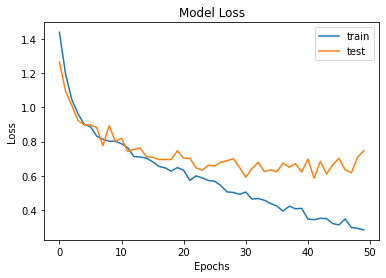

In [ ]:
### Loss Plot

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

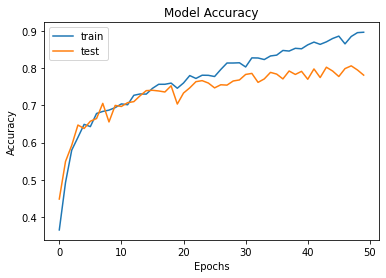

In [ ]:
### Accuracy Plot

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Model Testing

In [ ]:
# Predictions on Test Set

pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
# Storing some properly as well as misclassified indexes

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

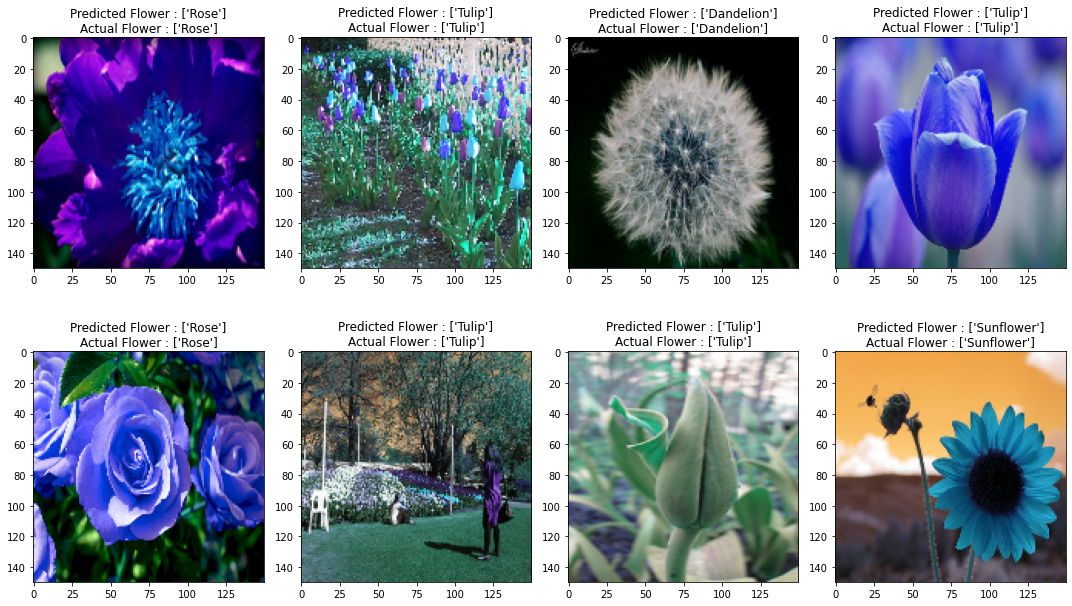

In [ ]:
### Correctly Classified Classes

count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,10)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

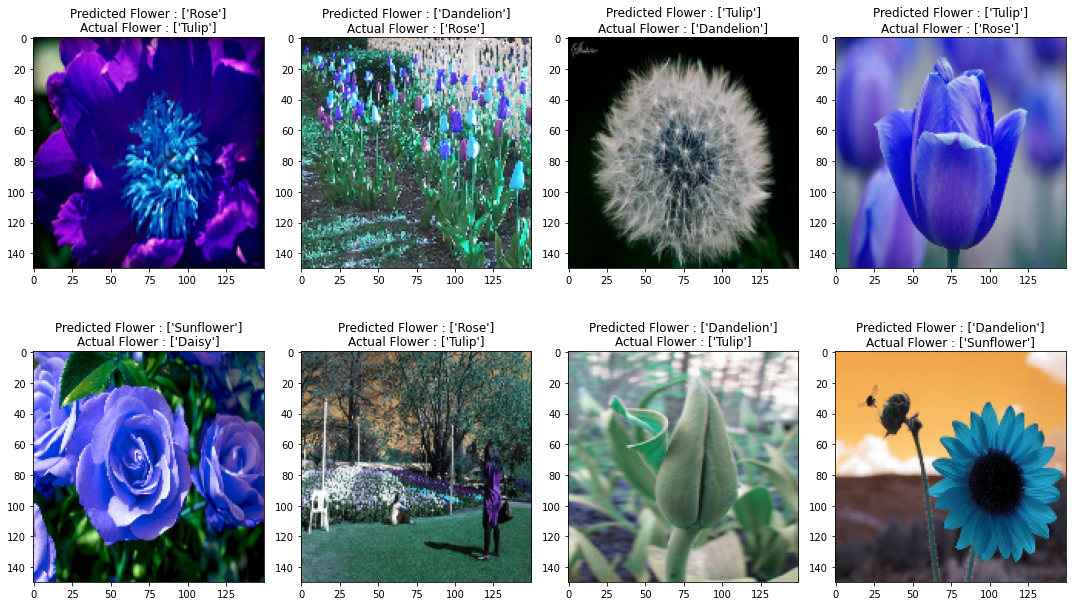

In [ ]:
### Misclassified Classes

count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,10)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

### Transfer Learning

In [ ]:
base_model=VGG16(include_top=False, weights=None, input_shape=(150,150,3), pooling='avg')

In [ ]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5,activation='softmax'))


for layer in base_model.layers:
    layer.trainable=True

model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 54s 1s/step - loss: 1.3299 - accuracy: 0.4429 - val_loss: 1.5690 - val_accuracy: 0.2296
Epoch 2/50
25/25 [==============================] - 24s 946ms/step - loss: 1.1551 - accuracy: 0.5275 - val_loss: 1.5410 - val_accuracy: 0.3000
Epoch 3/50
25/25 [==============================] - 24s 948ms/step - loss: 1.0597 - accuracy: 0.5706 - val_loss: 1.4936 - val_accuracy: 0.3741
Epoch 4/50
25/25 [==============================] - 24s 954ms/step - loss: 0.9750 - accuracy: 0.6115 - val_loss: 1.4205 - val_accuracy: 0.4463
Epoch 5/50
25/25 [==============================] - 24s 957ms/step - loss: 0.9649 - accuracy: 0.6330 - val_loss: 1.4147 - val_accuracy: 0.3620
Epoch 6/50
25/25 [==============================] - 24s 944ms/step - loss: 0.8849 - accuracy: 0.6665 - val_loss: 1.3790 - val_accuracy: 0.3981
Epoch 7/50
25/25 [==============================] - 24s 992ms/step - loss: 0.8976 - accuracy: 0.6578 - val_loss: 1.4957 - val_accuracy: 0.3713
Ep

### Transfer Learning Evaluation

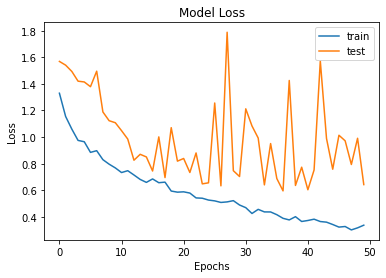

In [ ]:
### Loss Plot

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

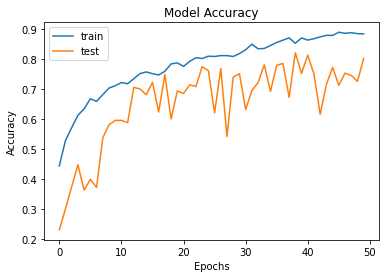

In [ ]:
### Accuracy Plot

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Transfer Learning Testing

In [ ]:
# Predictions on Test Set

pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
# Storing some properly as well as misclassified indexes

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

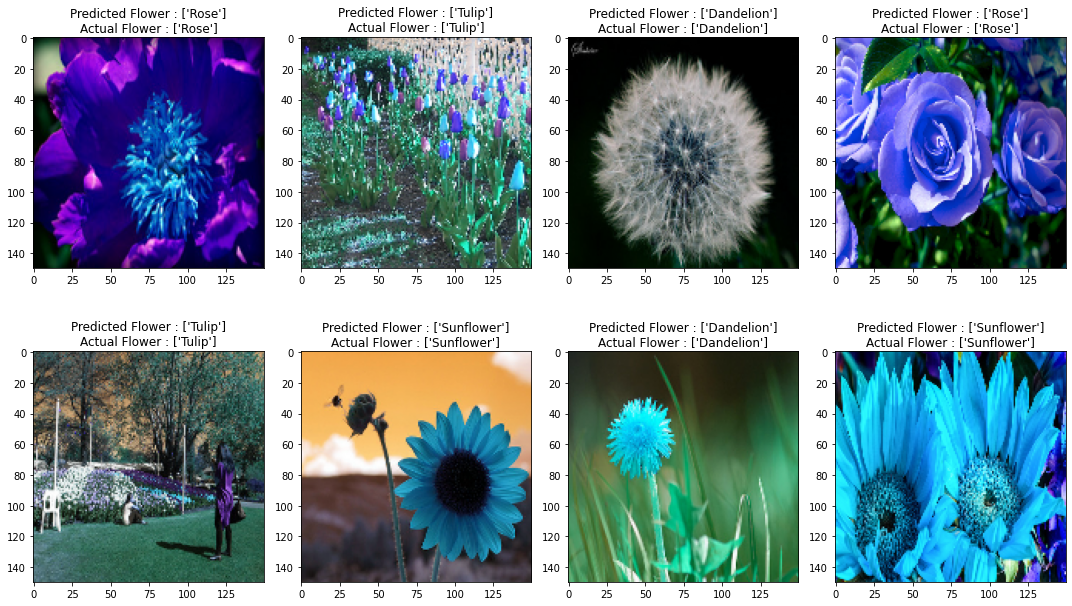

In [ ]:
### Correctly Classified Classes

count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,10)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

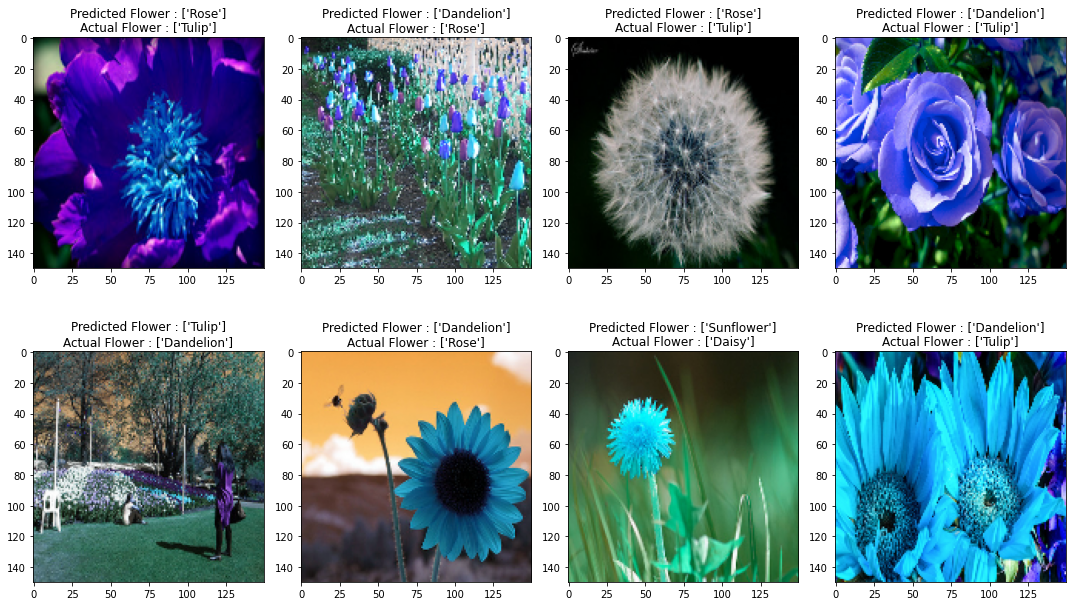

In [ ]:
### Misclassified Classes

count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,10)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1